<a href="https://colab.research.google.com/github/JuanC-Fandino/RedClasificacionResiduos/blob/master/RedClasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías

In [1]:
import tensorflow as tf
import numpy as np
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import itertools

# Obtención del Dataset

In [2]:
!git clone https://github.com/JuanC-Fandino/RedClasificacionResiduos.git

Cloning into 'RedClasificacionResiduos'...
remote: Enumerating objects: 2543, done.
remote: Counting objects: 100% (2543/2543), done.
remote: Compressing objects: 100% (2540/2540), done.
remote: Total 2543 (delta 5), reused 2535 (delta 1), pack-reused 0
Receiving objects: 100% (2543/2543), 40.46 MiB | 17.82 MiB/s, done.
Resolving deltas: 100% (5/5), done.


# Creación de los sets de entrenamiento y validación

In [3]:
DIR = "/content/RedClasificacionResiduos/dataset"
alto_img = 256
ancho_img = 256
batch_size = 128
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(DIR, validation_split=0.2, subset="training", batch_size=batch_size, smart_resize=True, image_size=(alto_img, ancho_img), seed=25)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(DIR, validation_split=0.2, subset="validation", batch_size=batch_size, smart_resize=True, image_size=(alto_img, ancho_img), seed=25)

clases = train_dataset.class_names
total_clases = len(train_dataset.class_names)
print(clases)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Found 2527 files belonging to 6 classes.
Using 505 files for validation.
['Basura', 'Carton', 'Metal', 'Papel', 'Plastico', 'Vidrio']


# Optimización del flujo de datos


In [4]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

# Entrenamiento del modelo

In [5]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(alto_img,
                                  ancho_img,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(alto_img, ancho_img, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(total_clases)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=50
history = model.fit(
  train_dataset,
  validation_data=test_dataset,
  epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/50
16/16 [==============================] - 24s 453ms/step - loss: 1.6913 - accuracy: 0.2671 - val_loss: 1.7260 - val_accuracy: 0.3861
Epoch 2/50
16/16 [==============================] - 6s 288ms/step - loss: 1.4128 - accuracy: 0.4431 - val_loss: 1.3011 - val_accuracy: 0.4931
Epoch 3/50
16/16 [==============================] - 6s 292ms/step - loss: 1.2435 - accuracy: 0.5089 - val_loss: 1.1893 - val_accuracy: 0.5683
Epoch 4/50
16/16 [==============================] - 6s 292ms/step - loss: 1.1051 - accuracy: 0.5762 - val_loss: 1.1066 - val_accuracy: 0.6000
Epoch 5/50
16/16 [==============================] - 6s 294ms/step - loss: 1.0123 - accuracy: 0.6187 - val_loss: 1.0424 - val_accuracy: 0.6515
Epoch 6/50
16/16 [==============================] - 6s 290ms/step - loss: 0.8812 - accuracy: 0.6667 - val_loss: 1.0605 - val_accuracy: 0.6119
Epoch 7/50
16/16 [==============================] - 6s 293ms/step - loss: 0.7898 - accuracy: 0.7097 - val_loss: 1.0129 - val_accuracy: 0.6634
Epoch

In [6]:
 model.save("residuos_model.h5")

!pip install tensorflowjs
!tensorflowjs_converter --input_format keras "residuos_model.h5" ./jsmodel --output_format=tfjs_graph_model 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 8.0 MB/s 
     |████████████████████████████████| 40 kB 7.1 MB/s 
     |████████████████████████████████| 180 kB 64.5 MB/s 
     |████████████████████████████████| 1.1 MB 53.9 MB/s 
     |████████████████████████████████| 145 kB 61.6 MB/s 
     |████████████████████████████████| 217 kB 73.7 MB/s 
     |████████████████████████████████| 51 kB 6.7 MB/s 
     |████████████████████████████████| 76 kB 6.7 MB/s 
  Created wheel for jax: filename=jax-0.3.17-py3-none-any.whl size=1217867 sha256=a25172a7234aace44b83c0c26028e418a5f3efa760db17a1266a1e102f716784
  Stored in directory: /root/.cache/pip/wheels/ef/87/bc/e175212cdfdee1d1930ea2f4163106dd243a0ae02c300108a3
Successfully built jax
  Attempting uninstall: jax
    Found existing installation: jax 0.3.14
    Uninstalling jax-0.3.14:
      Successfully uninstalled jax-0.3.14
  Attempting uninstall: p

2022-09-06 12:31:58.180455: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2022-09-06 12:31:58.744915: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
Writing weight file ./jsmodel/model.json...


# Guardar modelo

In [7]:
!zip -r /content/model.zip /content/jsmodel

  adding: content/jsmodel/ (stored 0%)
  adding: content/jsmodel/group1-shard4of9.bin (deflated 7%)
  adding: content/jsmodel/group1-shard1of9.bin (deflated 7%)
  adding: content/jsmodel/model.json (deflated 89%)
  adding: content/jsmodel/group1-shard8of9.bin (deflated 7%)
  adding: content/jsmodel/group1-shard2of9.bin (deflated 7%)
  adding: content/jsmodel/group1-shard7of9.bin (deflated 7%)
  adding: content/jsmodel/group1-shard3of9.bin (deflated 7%)
  adding: content/jsmodel/group1-shard6of9.bin (deflated 7%)
  adding: content/jsmodel/group1-shard5of9.bin (deflated 7%)
  adding: content/jsmodel/group1-shard9of9.bin (deflated 7%)


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)       

# Evaluación del Modelo

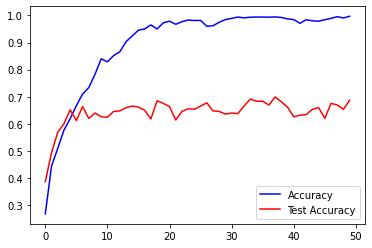

In [11]:
# Precisión
plt.plot(range(0, epochs), acc, color="b", label="Accuracy")
plt.plot(range(0, epochs), val_acc, color="r", label="Test Accuracy")
plt.legend()
plt.show()

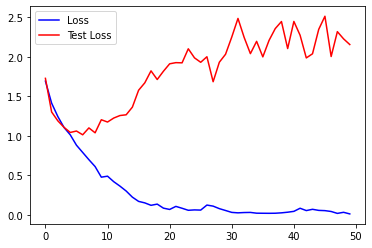

In [12]:
# Perdida
plt.plot(range(0, epochs), loss, color="b", label="Loss")
plt.plot(range(0, epochs), val_loss, color="r", label="Test Loss")
plt.legend()
plt.show()

<Figure size 720x720 with 0 Axes>

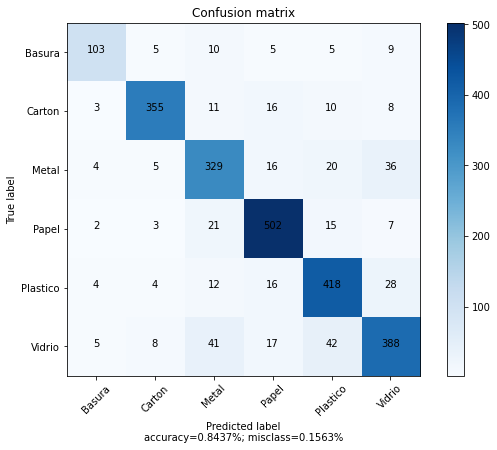

In [13]:
# Matriz de confusión
def plot_confusion_matrix(cm, target_names, cmap=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}%; misclass={:0.4f}%'.format(accuracy, misclass))
    plt.show()

plt.figure(figsize=(10, 10))
true = []
predictions = []

for i in os.listdir(DIR):
  folderPath = os.path.join(DIR, i)
  for j in os.listdir(folderPath)[:550]:
    fullPath = os.path.join(folderPath, j)
    try:
      img = tf.keras.preprocessing.image.load_img(fullPath, target_size=(256, 256))
      img_array = tf.keras.preprocessing.image.img_to_array(img)
      img_array = tf.expand_dims(img_array, 0) 

      preds = model.predict(img_array)
      true.append(clases.index(i))
      predictions.append(np.argmax(preds))
    except:
      print("Error on image:", fullPath)

plot_confusion_matrix(tf.math.confusion_matrix(true, predictions), clases)